## 1. Importamos las librerias

In [2]:
from sklearn import datasets
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

## 2. Cargamos datos

In [3]:
# Cargamos el .csv 

# Datos museo
artWorks = 'Prado_artworks_wikidata.csv'
artWorksData = pd.read_csv(artWorks)
# Museo
print("Obras de arte: \n")
print("(Individuos, Num Variables): ", artWorksData.shape)
print("Nombres variables: ", artWorksData.keys())

Obras de arte: 

(Individuos, Num Variables):  (30, 13)
Nombres variables:  Index(['ID', 'Category', 'Artist', 'Title', 'Year', 'Image URL',
       'Painting Info URL', 'Artist Info URL', 'Location', 'wd:paintingID',
       'wd:paintingURL', 'wd:artistID', 'wd:artistURL'],
      dtype='object')


## 3. Evaluación y limpieza de datos

### Análisis de la variable userId (un registro por Id)

In [4]:
# Comprobamos que tenemos un registro por id
repeated = artWorksData[artWorksData['ID'].duplicated() == True]

print("Número de userId repetidos: ", repeated['ID'].count())

Número de userId repetidos:  0


### Análisis de la variable category (categorias, missing, frecuencia)

Categoria y frecuencia:

Northern Renaissance    15
Baroque                  7
Romanticism              6
High Renaissance         2
Name: Category, dtype: int64 

Ilustramos la informacion con un gráfico:



<AxesSubplot:ylabel='Category'>

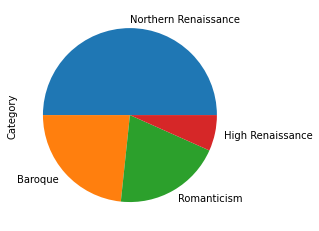

In [5]:
# Analizamos cuántas categorias de category se registran.
categoryCat = artWorksData['Category'].value_counts()
print("Categoria y frecuencia:\n")
print(categoryCat, "\n")
print("Ilustramos la informacion con un gráfico:\n")
categoryCat.plot.pie()

In [6]:
# Comprobamos si hay existe algun missing dentro de la variable category
print("Numero de missing en la variable category: ",artWorksData['Category'].isnull().sum())

Numero de missing en la variable category:  0


### Análisis de la variable artist (categorias, missing, frecuencia)

Categoria y frecuencia:

Francisco Goya              6
Francisco de Zurbaran       5
Hieronymus Bosch            3
Correggio                   1
Albrecht Durer              1
Joachim Wtewael             1
Gerard David                1
Petrus Christus             1
Pieter Bruegel the Elder    1
Hans Baldung                1
Dieric Bouts                1
Diego Velazquez             1
Caravaggio                  1
Jan van Hemessen            1
Dirk Bouts                  1
Hans Memling                1
Robert Campin               1
Andrea del Sarto            1
Lucas Cranach the Elder     1
Name: Artist, dtype: int64 

Ilustramos la informacion con un gráfico:



<AxesSubplot:ylabel='Artist'>

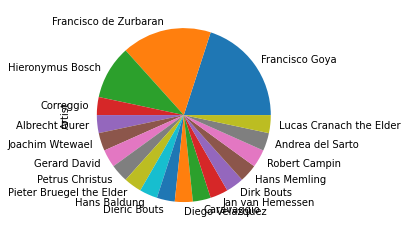

In [7]:
# Analizamos cuántas categorias de artist se registran.
categoryArt = artWorksData['Artist'].value_counts()
print("Categoria y frecuencia:\n")
print(categoryArt, "\n")
print("Ilustramos la informacion con un gráfico:\n")
categoryArt.plot.pie()

In [8]:
# Comprobamos si hay existe algun missing dentro de la variable artist
print("Numero de missing en la variable artist: ",artWorksData['Artist'].isnull().sum())

Numero de missing en la variable artist:  0


### Análisis de la variable title (categorias, missing, frecuencia)

Categoria y frecuencia:

The Pearl of Brabant                                      1
David and Goliath                                         1
The Extraction of the Stone Madness                       1
The Seven Deadly Sins and the Four Last Things            1
The Triumph of Death                                      1
Still Life with Pots                                      1
Hercules Fighting with the Hydra of Lernea                1
Apparition of the Apostle Peter to Saint Peter Nolasco    1
Triptych of the Virgin's Life                             1
Noli Me Tangere                                           1
Self-Portrait                                             1
Lucrezia di Baccio del Fede                               1
The nude maja                                             1
Saturn Devouring His Son                                  1
St. Rufina of Seville                                     1
The Werl Triptych                                         1
Rest on the Fli

<AxesSubplot:ylabel='Title'>

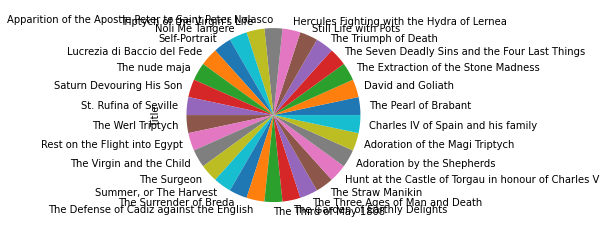

In [9]:
# Analizamos cuántas categorias de title se registran.
categoryTit = artWorksData['Title'].value_counts()
print("Categoria y frecuencia:\n")
print(categoryTit, "\n")
print("Ilustramos la informacion con un gráfico:\n")
categoryTit.plot.pie()

In [10]:
# Comprobamos si hay existe algun missing dentro de la variable title
print("Numero de missing en la variable title: ",artWorksData['Title'].isnull().sum())

Numero de missing en la variable title:  0


### Análisis de la variable Year (categorias, missing, frecuencia)

In [11]:
# Analizamos cuántas categorias de Year se registran.
categoryYear = artWorksData['Year'].value_counts()
print("Categoria y frecuencia:\n")
print(categoryYear, "\n")
print("Ilustramos la informacion con un gráfico:\n")
categoryYear.plot

Categoria y frecuencia:

1510-1515    2
1634         2
1800         2
1819-1823    1
1562-1563    1
1634-1635    1
1485         1
1534         1
1494-1516    1
1814         1
1625         1
1468         1
1629         1
1445         1
1786         1
1544         1
1498         1
1599         1
1438         1
1633         1
1539         1
1635-1640    1
XVI cent.    1
1470         1
1791-1792    1
1513-1514    1
1460         1
Name: Year, dtype: int64 

Ilustramos la informacion con un gráfico:



In [12]:
# Comprobamos si hay existe algun missing dentro de la variable Year
print("Numero de missing en la variable Year: ",artWorksData['Year'].isnull().sum())

Numero de missing en la variable Year:  0


### Análisis de la variable Location (categorias, missing, frecuencia)

In [13]:
# Analizamos cuántas categorias de Location se registran.
categoryLoc = artWorksData['Location'].value_counts()
print("Categoria y frecuencia:\n")
print(categoryLoc, "\n")
print("Ilustramos la informacion con un gráfico:\n")
categoryLoc.plot

Categoria y frecuencia:

Museo del Prado, Madrid, Spain    30
Name: Location, dtype: int64 

Ilustramos la informacion con un gráfico:



In [14]:
# Comprobamos si hay existe algun missing dentro de la variable Year
print("Numero de missing en la variable Location: ",artWorksData['Location'].isnull().sum())

Numero de missing en la variable Location:  0


### Análisis de las variables Image URL, Painting Info URL, Artist Info URL, wd:paintingID, wd:paintingURL, wd:artistID, wd:artistURL (missing, frecuencia(repetidos) url validas)

In [38]:
# Comprobamos que para las variables: Image URL, Painting Info URL, wd:paintingURL tienen son distintas entre si (30 categorias). Mientras que que las referentes al artista deben coincidir
namesVar = artWorksData.keys()
for i in range (5, 12):
    numCategory = artWorksData[namesVar[i]].value_counts()
    print(namesVar[i], ":\n")
    print("Numero categorias: ", numCategory.size, "\n-------------------\n")


Image URL :

Numero categorias:  30 
-------------------

Painting Info URL :

Numero categorias:  30 
-------------------

Artist Info URL :

Numero categorias:  18 
-------------------

Location :

Numero categorias:  1 
-------------------

wd:paintingID :

Numero categorias:  30 
-------------------

wd:paintingURL :

Numero categorias:  30 
-------------------

wd:artistID :

Numero categorias:  18 
-------------------



In [7]:
# Comprueba que las url son validas
import requests

def url_ok(url):
    r = requests.get(url)
    return r.status_code == 200

requests.exceptions.URLRequired('https://www.awin1.com/pclick.php?p=27621706535&a=365579&m=18078')

In [136]:
# Eliminamos las variables location, paintingID y artistID
artWorksDataURLs = artWorksData.drop(['ID', 'Category', 'Artist', 'Title', 'Year', 'Location', 'wd:paintingID', 'wd:artistID'], axis = 1)

# Comprobamos que todas las urls son validas
for nameVar in artWorksDataURLs.keys():
    print("- URL no validas de la variable ", nameVar, ":\n")
    for url in artWorksDataURLs[nameVar]:
        if (url_ok(url) != True):
            print(url, "\n")

URL no validas de la variable  Image URL 

URL no validas de la variable  Painting Info URL 

URL no validas de la variable  Artist Info URL 

URL no validas de la variable  wd:paintingURL 

URL no validas de la variable  wd:artistURL 

